In [1]:
!pip install pandas openpyxl



[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
!pip install folium pandas openpyxlz

ERROR: Could not find a version that satisfies the requirement openpyxlz (from versions: none)
ERROR: No matching distribution found for openpyxlz

[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import pandas as pd

# Cargar el archivo Excel en un DataFrame
df = pd.read_excel('mercado.xlsx')

# Mostrar las primeras filas del DataFrame
print(df.head())


   Num      País                                           Compañía  \
0    1  Colombia                    Promotora de Cafe Colombia S.A.   
1    2  Colombia  Ircc S.A.S Industria de Restaurantes Casuales ...   
2    3  Colombia                        Zx Ventures Colombia S.A.S.   
3    4  Colombia                              Estrella Andina S A S   
4    5  Colombia                                 Comidas Varpel Sas   

                                      Sector (NAICS)  \
0  Restaurantes y Otros Lugares para Comer(72251)...   
1  Bares y Otros Lugares para Beber(7224); Servic...   
2             Bares y Otros Lugares para Beber(7224)   
3  Cafeterías y Bares para Bebidas sin Alcohol(72...   
4     Restaurantes y Otros Lugares para Comer(72251)   

                     Principales Actividades (NAICS)  \
0  Restaurantes y Otros Lugares para Comer(72251)...   
1  Bares y Otros Lugares para Beber(7224); Servic...   
2             Bares y Otros Lugares para Beber(7224)   
3  Cafetería

In [2]:
df.columns

Index(['Num', 'País', 'Compañía', 'Sector (NAICS)',
       'Principales Actividades (NAICS)', 'Sector (CIIU Rev.4 A.C.)',
       'Principales Actividades (CIIU Rev.4 A.C.)',
       'Descripción de la compañía / productos', 'Dirección', 'Teléfono',
       'Correo Electrónico', 'Página Web', 'Redes sociales',
       'Principales Ejecutivos', 'Número de empleados',
       'Ganancia operativa (EBIT)', 'Total Ingreso Operativo',
       'Ganancia (Pérdida) Neta', 'Activos Totales',
       'Propiedad, planta y equipo', 'Total de patrimonio',
       'Flujo de caja libre', 'Precio de cierre',
       'Ganancia o Pérdida del Periodo', 'Pasivos Totales', 'Ciudad',
       'Año Fiscal', 'Auditado', 'Consolidado', 'Fuente'],
      dtype='object')

In [12]:
import pandas as pd
import folium
from folium.plugins import MarkerCluster
from geopy.geocoders import Nominatim
import time
import re  # Importar el módulo de expresiones regulares
from IPython.display import display  # Importar display para mostrar el mapa

# Cargar el archivo Excel en un DataFrame
df = pd.read_excel('mercado.xlsx')

# Filtrar el DataFrame para incluir solo las filas con dirección no nula
df = df[df['Dirección'].notna()]

# Tomar los primeros 20 registros
df_10 = df.head(15)

# Crear un mapa centrado en Bogotá
mapa = folium.Map(location=[4.6101, -74.0817], zoom_start=12)  # Coordenadas aproximadas de Bogotá

# Crear un clúster de marcadores
marker_cluster = MarkerCluster().add_to(mapa)

# Inicializar el geocodificador
geolocator = Nominatim(user_agent="mi_geocodificador")

# Función para limpiar la dirección
def limpiar_direccion(direccion):
    # Eliminar "Piso" y lo que le sigue
    direccion_limpia = re.sub(r',? Piso \d+', '', direccion)  # Elimina "Piso" seguido de un número
    return direccion_limpia

# Agregar marcadores al mapa para los primeros 20 registros
for index, row in df_10.iterrows():
    # Limpiar la dirección para quitar información de piso
    direccion = limpiar_direccion(f"{row['Dirección']}, Bogotá")
    
    try:
        # Intentar geocodificar la dirección
        location = geolocator.geocode(direccion, timeout=10)  # Timeout de 10 segundos
    except Exception as e:
        print(f"Error al geocodificar '{direccion}': {e}")
        continue  # Continuar con la siguiente dirección

    if location:
        # Crear contenido para el popup con todas las columnas y agregar scroll
        popup_content = """
        <div style="max-height: 200px; overflow-y: auto;">
            <strong>Detalles de la Compañía:</strong><br>
        """
        for col in df.columns:
            popup_content += f"<strong>{col}:</strong> {row[col]}<br>"
        popup_content += "</div>"

        folium.Marker(
            location=[location.latitude, location.longitude],
            popup=folium.Popup(popup_content, max_width=300),
            icon=folium.Icon(color='blue')
        ).add_to(marker_cluster)
        print(f"Georeferenciado exitoso: {direccion}")
    else:
        print(f"No se pudo geocodificar la dirección: {direccion}")

    # Pausa de 1 segundo entre solicitudes para evitar limitaciones
    time.sleep(1)

# Mostrar el mapa en Jupyter Notebook
display(mapa)


Georeferenciado exitoso: Cl 73 # 8 - 13 To A P 3, Bogotá
Georeferenciado exitoso: 45 # 232 - 35 Lc 4 - 113, Bogotá
Georeferenciado exitoso: Cra 53 A No 127 - 35, Bogotá
Georeferenciado exitoso: Calle 84 # 11 - 50, Bogotá
No se pudo geocodificar la dirección: Av Cr 24 # 52 - 18, Bogotá
Georeferenciado exitoso: Cra 13 83 - 47, Bogotá
No se pudo geocodificar la dirección: Cl 28 # 32 A 61, Bogotá
No se pudo geocodificar la dirección: Cr 15 79-83, Bogotá
Georeferenciado exitoso: Cr 25 A 44 69 Sur, Bogotá
No se pudo geocodificar la dirección: Cll 98 A # 60-53, Bogotá
Georeferenciado exitoso: Calle 75 A N 27-15, Bogotá
Georeferenciado exitoso: Cl 58 Bis # 10 32, Bogotá
Georeferenciado exitoso: Cll 94 B N 56 24, Bogotá
No se pudo geocodificar la dirección: Cra 63 No 100 77, Bogotá
No se pudo geocodificar la dirección: Calle 174 A 53 A 22, Bogotá


In [13]:
import pandas as pd
import folium
from folium.plugins import MarkerCluster
from geopy.geocoders import Nominatim
import time
import re  # Importar el módulo de expresiones regulares
from IPython.display import display  # Importar display para mostrar el mapa

# Cargar el archivo Excel en un DataFrame
df = pd.read_excel('mercado.xlsx')

# Filtrar el DataFrame para incluir solo las filas con dirección no nula
df = df[df['Dirección'].notna()]

# Tomar todos los registros
df_10 = df.head(1000)

# Crear un mapa centrado en Bogotá
mapa = folium.Map(location=[4.6101, -74.0817], zoom_start=12)  # Coordenadas aproximadas de Bogotá

# Crear un clúster de marcadores
marker_cluster = MarkerCluster().add_to(mapa)

# Inicializar el geocodificador
geolocator = Nominatim(user_agent="mi_geocodificador")

# Función para limpiar la dirección
def limpiar_direccion(direccion):
    # Eliminar "Piso" y lo que le sigue
    direccion_limpia = re.sub(r',? Piso \d+', '', direccion)  # Elimina "Piso" seguido de un número
    return direccion_limpia

# Agregar marcadores al mapa solo para las direcciones que se puedan georreferenciar
for index, row in df_10.iterrows():
    # Limpiar la dirección para quitar información de piso
    direccion = limpiar_direccion(f"{row['Dirección']}, Bogotá")
    
    try:
        # Intentar geocodificar la dirección
        location = geolocator.geocode(direccion, timeout=10)  # Timeout de 10 segundos
    except Exception as e:
        print(f"Error al geocodificar '{direccion}': {e}")
        continue  # Continuar con la siguiente dirección si hay error

    if location:
        # Crear contenido para el popup con todas las columnas y agregar scroll
        popup_content = """
        <div style="max-height: 200px; overflow-y: auto;">
            <strong>Detalles de la Compañía:</strong><br>
        """
        for col in df.columns:
            popup_content += f"<strong>{col}:</strong> {row[col]}<br>"
        popup_content += "</div>"

        # Agregar el marcador solo si la geocodificación fue exitosa
        folium.Marker(
            location=[location.latitude, location.longitude],
            popup=folium.Popup(popup_content, max_width=300),
            icon=folium.Icon(color='blue')
        ).add_to(marker_cluster)
        print(f"Georeferenciado exitoso: {direccion}")
    else:
        print(f"No se pudo geocodificar la dirección: {direccion}")

    # Pausa de 1 segundo entre solicitudes para evitar limitaciones
    time.sleep(1)

# Mostrar el mapa en Jupyter Notebook
display(mapa)


Georeferenciado exitoso: Cl 73 # 8 - 13 To A P 3, Bogotá
Georeferenciado exitoso: 45 # 232 - 35 Lc 4 - 113, Bogotá
Georeferenciado exitoso: Cra 53 A No 127 - 35, Bogotá
Georeferenciado exitoso: Calle 84 # 11 - 50, Bogotá
No se pudo geocodificar la dirección: Av Cr 24 # 52 - 18, Bogotá
Georeferenciado exitoso: Cra 13 83 - 47, Bogotá
No se pudo geocodificar la dirección: Cl 28 # 32 A 61, Bogotá
No se pudo geocodificar la dirección: Cr 15 79-83, Bogotá
Georeferenciado exitoso: Cr 25 A 44 69 Sur, Bogotá
No se pudo geocodificar la dirección: Cll 98 A # 60-53, Bogotá
Georeferenciado exitoso: Calle 75 A N 27-15, Bogotá
Georeferenciado exitoso: Cl 58 Bis # 10 32, Bogotá
Georeferenciado exitoso: Cll 94 B N 56 24, Bogotá
No se pudo geocodificar la dirección: Cra 63 No 100 77, Bogotá
No se pudo geocodificar la dirección: Calle 174 A 53 A 22, Bogotá
Georeferenciado exitoso: Calle 116 # 19 -66, Bogotá
No se pudo geocodificar la dirección: Cr 59 D # 131A-25, Bogotá
Georeferenciado exitoso: Carrera 1

## Mapa directorio

In [9]:
#baseactualselect
import pandas as pd
import folium
from folium.plugins import Search  # Importar el plugin Search
from geopy.geocoders import Nominatim
import time
import re  # Importar el módulo de expresiones regulares
from IPython.display import display  # Importar display para mostrar el mapa

# Cargar el archivo Excel en un DataFrame
df = pd.read_excel('mercado.xlsx')

# Filtrar el DataFrame para incluir solo las filas con dirección no nula
df = df[df['Dirección'].notna()]

# Tomar todos los registros (aquí se pueden ajustar los registros a mostrar)
df_10 = df
# Crear un mapa centrado en Bogotá
mapa = folium.Map(location=[4.6101, -74.0817], zoom_start=12)  # Coordenadas aproximadas de Bogotá

# Inicializar el geocodificador
geolocator = Nominatim(user_agent="mi_geocodificador")

# Función para limpiar la dirección
def limpiar_direccion(direccion):
    # Eliminar "Piso" y lo que le sigue
    direccion_limpia = re.sub(r',? Piso \d+', '', direccion)  # Elimina "Piso" seguido de un número
    return direccion_limpia

# Lista para almacenar los marcadores
markers = []

# Agregar marcadores al mapa solo para las direcciones que se puedan georreferenciar
for index, row in df_10.iterrows():
    # Limpiar la dirección para quitar información de piso
    direccion = limpiar_direccion(f"{row['Dirección']}, Bogotá")
    
    try:
        # Intentar geocodificar la dirección
        location = geolocator.geocode(direccion, timeout=10)  # Timeout de 10 segundos
    except Exception as e:
        print(f"Error al geocodificar '{direccion}': {e}")
        continue  # Continuar con la siguiente dirección si hay error

    if location:
        # Crear contenido para el popup con todas las columnas y agregar scroll
        popup_content = """
        <div style="max-height: 200px; overflow-y: auto;">
            <strong>Detalles de la Compañía:</strong><br>
        """
        for col in df.columns:
            popup_content += f"<strong>{col}:</strong> {row[col]}<br>"
        popup_content += "</div>"

        # Agregar el marcador solo si la geocodificación fue exitosa
        marker = folium.Marker(
            location=[location.latitude, location.longitude],
            popup=folium.Popup(popup_content, max_width=300),
            icon=folium.Icon(color='blue'),
            # Usar el nombre de la compañía para la búsqueda
            name=row['Compañía']  
        )
        markers.append(marker)  # Agregar el marcador a la lista
        print(f"Georeferenciado exitoso: {direccion}")
    else:
        print(f"No se pudo geocodificar la dirección: {direccion}")

    # Pausa de 1 segundo entre solicitudes para evitar limitaciones
    time.sleep(1)

# Crear un FeatureGroup para los marcadores
fg = folium.FeatureGroup(name='Marcadores')

# Agregar los marcadores al FeatureGroup
for marker in markers:
    marker.add_to(fg)

# Añadir el FeatureGroup al mapa
fg.add_to(mapa)

# Agregar el buscador al mapa
search = Search(
    layer=fg,  # Referirse al FeatureGroup con los marcadores
    geom_type='Point',
    placeholder='Buscar una compañía',
    collapsed=False,
    search_label='name',  # Usar el nombre de la compañía para la búsqueda
)

# Añadir la capa de búsqueda al mapa
search.add_to(mapa)

# JavaScript para hacer zoom en la ubicación seleccionada
mapa.get_root().html.add_child(folium.Element("""
<script>
    var search = document.getElementsByClassName('leaflet-control-search')[0];
    search.addEventListener('change', function(e) {
        var name = e.target.value;
        var markers = document.getElementsByClassName('leaflet-marker-icon');
        for (var i = 0; i < markers.length; i++) {
            if (markers[i].title === name) {
                var latlng = markers[i]._leaflet_pos;
                var map = L.map('map');
                map.setView([latlng.y, latlng.x], 15); // Zoom level 15
                break;
            }
        }
    });
</script>
"""))

# Mostrar el mapa en Jupyter Notebook
display(mapa)


Georeferenciado exitoso: Cl 73 # 8 - 13 To A P 3, Bogotá
Georeferenciado exitoso: 45 # 232 - 35 Lc 4 - 113, Bogotá
Georeferenciado exitoso: Cra 53 A No 127 - 35, Bogotá
Georeferenciado exitoso: Calle 84 # 11 - 50, Bogotá
No se pudo geocodificar la dirección: Av Cr 24 # 52 - 18, Bogotá
Georeferenciado exitoso: Cra 13 83 - 47, Bogotá
No se pudo geocodificar la dirección: Cl 28 # 32 A 61, Bogotá
No se pudo geocodificar la dirección: Cr 15 79-83, Bogotá
Georeferenciado exitoso: Cr 25 A 44 69 Sur, Bogotá
No se pudo geocodificar la dirección: Cll 98 A # 60-53, Bogotá
Georeferenciado exitoso: Calle 75 A N 27-15, Bogotá
Georeferenciado exitoso: Cl 58 Bis # 10 32, Bogotá
Georeferenciado exitoso: Cll 94 B N 56 24, Bogotá
No se pudo geocodificar la dirección: Cra 63 No 100 77, Bogotá
No se pudo geocodificar la dirección: Calle 174 A 53 A 22, Bogotá
Georeferenciado exitoso: Calle 116 # 19 -66, Bogotá
No se pudo geocodificar la dirección: Cr 59 D # 131A-25, Bogotá
Georeferenciado exitoso: Carrera 1

In [10]:
mapa.save('mapa_geolocalizado_buscador.html')

In [13]:
pip install pandas folium geopy openpyxl


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [14]:
pip show pandas folium geopy openpyxl


Name: pandasNote: you may need to restart the kernel to use updated packages.

Version: 2.2.3
Summary: Powerful data structures for data analysis, time series, and statistics
Home-page: https://pandas.pydata.org
Author: 
Author-email: The Pandas Development Team <pandas-dev@python.org>
License: BSD 3-Clause License

Copyright (c) 2008-2011, AQR Capital Management, LLC, Lambda Foundry, Inc. and PyData Development Team
All rights reserved.

Copyright (c) 2011-2023, Open source contributors.

Redistribution and use in source and binary forms, with or without
modification, are permitted provided that the following conditions are met:

* Redistributions of source code must retain the above copyright notice, this
  list of conditions and the following disclaimer.

* Redistributions in binary form must reproduce the above copyright notice,
  this list of conditions and the following disclaimer in the documentation
  and/or other materials provided with the distribution.

* Neither the name of

In [5]:
import pandas as pd
import folium
from folium.plugins import Search  # Importar el plugin Search
from geopy.geocoders import Nominatim
import time
import re  # Importar el módulo de expresiones regulares
from IPython.display import display  # Importar display para mostrar el mapa

# Cargar el archivo Excel en un DataFrame
df = pd.read_excel('mercado.xlsx')

# Filtrar el DataFrame para incluir solo las filas con dirección no nula
df = df[df['Dirección'].notna()]

# Tomar todos los registros
df_10 = df.head(15)

# Crear un mapa centrado en Bogotá
mapa = folium.Map(location=[4.6101, -74.0817], zoom_start=12)  # Coordenadas aproximadas de Bogotá

# Inicializar el geocodificador
geolocator = Nominatim(user_agent="mi_geocodificador")

# Función para limpiar la dirección
def limpiar_direccion(direccion):
    # Eliminar "Piso" y lo que le sigue
    direccion_limpia = re.sub(r',? Piso \d+', '', direccion)  # Elimina "Piso" seguido de un número
    return direccion_limpia

# Crear una lista para almacenar los marcadores y sus ubicaciones
marcadores = []

# Agregar marcadores al mapa solo para las direcciones que se puedan georreferenciar
for index, row in df_10.iterrows():
    # Limpiar la dirección para quitar información de piso
    direccion = limpiar_direccion(f"{row['Dirección']}, Bogotá")
    
    try:
        # Intentar geocodificar la dirección
        location = geolocator.geocode(direccion, timeout=10)  # Timeout de 10 segundos
    except Exception as e:
        print(f"Error al geocodificar '{direccion}': {e}")
        continue  # Continuar con la siguiente dirección si hay error

    if location:
        # Crear contenido para el popup con todas las columnas y agregar scroll
        popup_content = """
        <div style="max-height: 200px; overflow-y: auto;">
            <strong>Detalles de la Compañía:</strong><br>
        """
        for col in df.columns:
            popup_content += f"<strong>{col}:</strong> {row[col]}<br>"
        popup_content += "</div>"

        # Agregar el marcador solo si la geocodificación fue exitosa
        folium.Marker(
            location=[location.latitude, location.longitude],
            popup=folium.Popup(popup_content, max_width=300),
            icon=folium.Icon(color='blue'),
            name=row['Dirección']  # Agregar un nombre para la búsqueda
        ).add_to(mapa)  # Agregar el marcador directamente al mapa
        
        # Añadir la dirección y su ubicación a la lista de marcadores
        marcadores.append({'name': row['Dirección'], 'location': [location.latitude, location.longitude]})

        print(f"Georeferenciado exitoso: {direccion}")
    else:
        print(f"No se pudo geocodificar la dirección: {direccion}")

    # Pausa de 1 segundo entre solicitudes para evitar limitaciones
    time.sleep(1)

# Agregar el buscador al mapa
search_layer = folium.FeatureGroup(name='Marcadores')
for marcador in marcadores:
    folium.Marker(
        location=marcador['location'],
        popup=marcador['name'],
        icon=folium.Icon(color='blue'),
        name=marcador['name']  # Asegúrate de que el nombre se utilice aquí
    ).add_to(search_layer)

search_layer.add_to(mapa)

Search(
    layer=search_layer,
    geom_type='Point',
    placeholder='Buscar una dirección',
    collapsed=False,
    search_label='name',
).add_to(mapa)

# Mostrar el mapa en Jupyter Notebook
display(mapa)


Georeferenciado exitoso: Cl 73 # 8 - 13 To A P 3, Bogotá
Georeferenciado exitoso: 45 # 232 - 35 Lc 4 - 113, Bogotá
Georeferenciado exitoso: Cra 53 A No 127 - 35, Bogotá
Georeferenciado exitoso: Calle 84 # 11 - 50, Bogotá
No se pudo geocodificar la dirección: Av Cr 24 # 52 - 18, Bogotá
Georeferenciado exitoso: Cra 13 83 - 47, Bogotá
No se pudo geocodificar la dirección: Cl 28 # 32 A 61, Bogotá
No se pudo geocodificar la dirección: Cr 15 79-83, Bogotá
Georeferenciado exitoso: Cr 25 A 44 69 Sur, Bogotá
No se pudo geocodificar la dirección: Cll 98 A # 60-53, Bogotá
Georeferenciado exitoso: Calle 75 A N 27-15, Bogotá
Georeferenciado exitoso: Cl 58 Bis # 10 32, Bogotá
Georeferenciado exitoso: Cll 94 B N 56 24, Bogotá
No se pudo geocodificar la dirección: Cra 63 No 100 77, Bogotá
No se pudo geocodificar la dirección: Calle 174 A 53 A 22, Bogotá


In [9]:
!pip install -q googlemaps


[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
mapa.save('mapa_geolocalizado.html')

In [3]:
import pandas as pd
import folium
from folium.plugins import HeatMap
from geopy.geocoders import Nominatim
import time
import re  # Importar el módulo de expresiones regulares
from IPython.display import display  # Importar display para mostrar el mapa

# Cargar el archivo Excel en un DataFrame
df = pd.read_excel('mercado.xlsx')

# Filtrar el DataFrame para incluir solo las filas con dirección no nula
df = df[df['Dirección'].notna()]

# Tomar los primeros 20 registros
df_10 = df.head(20)

# Crear un mapa centrado en Bogotá
mapa = folium.Map(location=[4.6101, -74.0817], zoom_start=12)  # Coordenadas aproximadas de Bogotá

# Inicializar el geocodificador
geolocator = Nominatim(user_agent="mi_geocodificador")

# Función para limpiar la dirección
def limpiar_direccion(direccion):
    # Eliminar "Piso" y lo que le sigue
    direccion_limpia = re.sub(r',? Piso \d+', '', direccion)  # Elimina "Piso" seguido de un número
    return direccion_limpia

# Crear una lista para almacenar las coordenadas
coordenadas = []

# Agregar coordenadas al mapa para los primeros 20 registros
for index, row in df_10.iterrows():
    # Limpiar la dirección para quitar información de piso
    direccion = limpiar_direccion(f"{row['Dirección']}, Bogotá")
    
    try:
        # Intentar geocodificar la dirección
        location = geolocator.geocode(direccion, timeout=10)  # Timeout de 10 segundos
    except Exception as e:
        print(f"Error al geocodificar '{direccion}': {e}")
        continue  # Continuar con la siguiente dirección

    if location:
        # Almacenar la ubicación en la lista
        coordenadas.append([location.latitude, location.longitude])
        print(f"Georeferenciado exitoso: {direccion}")
    else:
        print(f"No se pudo geocodificar la dirección: {direccion}")

    # Pausa de 1 segundo entre solicitudes para evitar limitaciones
    time.sleep(1)

# Agregar el mapa de calor
if coordenadas:  # Verificar si hay coordenadas antes de crear el mapa de calor
    HeatMap(coordenadas).add_to(mapa)

# Mostrar el mapa en Jupyter Notebook
display(mapa)


Georeferenciado exitoso: Cl 73 # 8 - 13 To A P 3, Bogotá
Georeferenciado exitoso: 45 # 232 - 35 Lc 4 - 113, Bogotá
Georeferenciado exitoso: Cra 53 A No 127 - 35, Bogotá
Georeferenciado exitoso: Calle 84 # 11 - 50, Bogotá
No se pudo geocodificar la dirección: Av Cr 24 # 52 - 18, Bogotá
Georeferenciado exitoso: Cra 13 83 - 47, Bogotá
No se pudo geocodificar la dirección: Cl 28 # 32 A 61, Bogotá
No se pudo geocodificar la dirección: Cr 15 79-83, Bogotá
Georeferenciado exitoso: Cr 25 A 44 69 Sur, Bogotá
No se pudo geocodificar la dirección: Cll 98 A # 60-53, Bogotá
Georeferenciado exitoso: Calle 75 A N 27-15, Bogotá
Georeferenciado exitoso: Cl 58 Bis # 10 32, Bogotá
Georeferenciado exitoso: Cll 94 B N 56 24, Bogotá
No se pudo geocodificar la dirección: Cra 63 No 100 77, Bogotá
No se pudo geocodificar la dirección: Calle 174 A 53 A 22, Bogotá
Georeferenciado exitoso: Calle 116 # 19 -66, Bogotá
No se pudo geocodificar la dirección: Cr 59 D # 131A-25, Bogotá
Georeferenciado exitoso: Carrera 1

In [5]:
mapa.save('mapa_companiasjjj.html')

In [11]:
import pandas as pd

# Cargar el archivo Excel en un DataFrame
df = pd.read_excel('mercado.xlsx')

# Filtrar y ordenar el DataFrame por la ganancia neta en orden descendente
top_30_ganancias = df[['Compañía', 'Ganancia (Pérdida) Neta']].nlargest(30, 'Ganancia (Pérdida) Neta')

# Mostrar el resultado
print("Top 30 Empresas con Mayor Ganancia:")
print(top_30_ganancias)


Top 30 Empresas con Mayor Ganancia:
                                              Compañía  \
137                                   Sintenedor S A S   
1    Ircc S.A.S Industria de Restaurantes Casuales ...   
5                             Eventos & Desarrollo Sas   
11               Sociedad Theatron Entretenimiento Sas   
3                                Estrella Andina S A S   
9                                    Sipote Burrito Sa   
6    Industrial Hotelera y Alimentos Sas Dialimento...   
20                      Inversiones Ibero Caribe S A S   
83                                   In The Hood S A S   
23                     Bar Escoces e Inversiones S.A.S   
18                                Inversiones Fete Sas   
30                                           Yipao Sas   
10                            Alimentos Criollos S. A.   
51                            Inversiones Megaval Ltda   
175                           Gerardo Gonzalez Merchan   
167                           Martin

C:\Users\USER\AppData\Local\Temp\ipykernel_33776\3382355580.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Ganancia (Pérdida) Neta', y='Compañía', data=top_30_ganancias, palette='viridis')


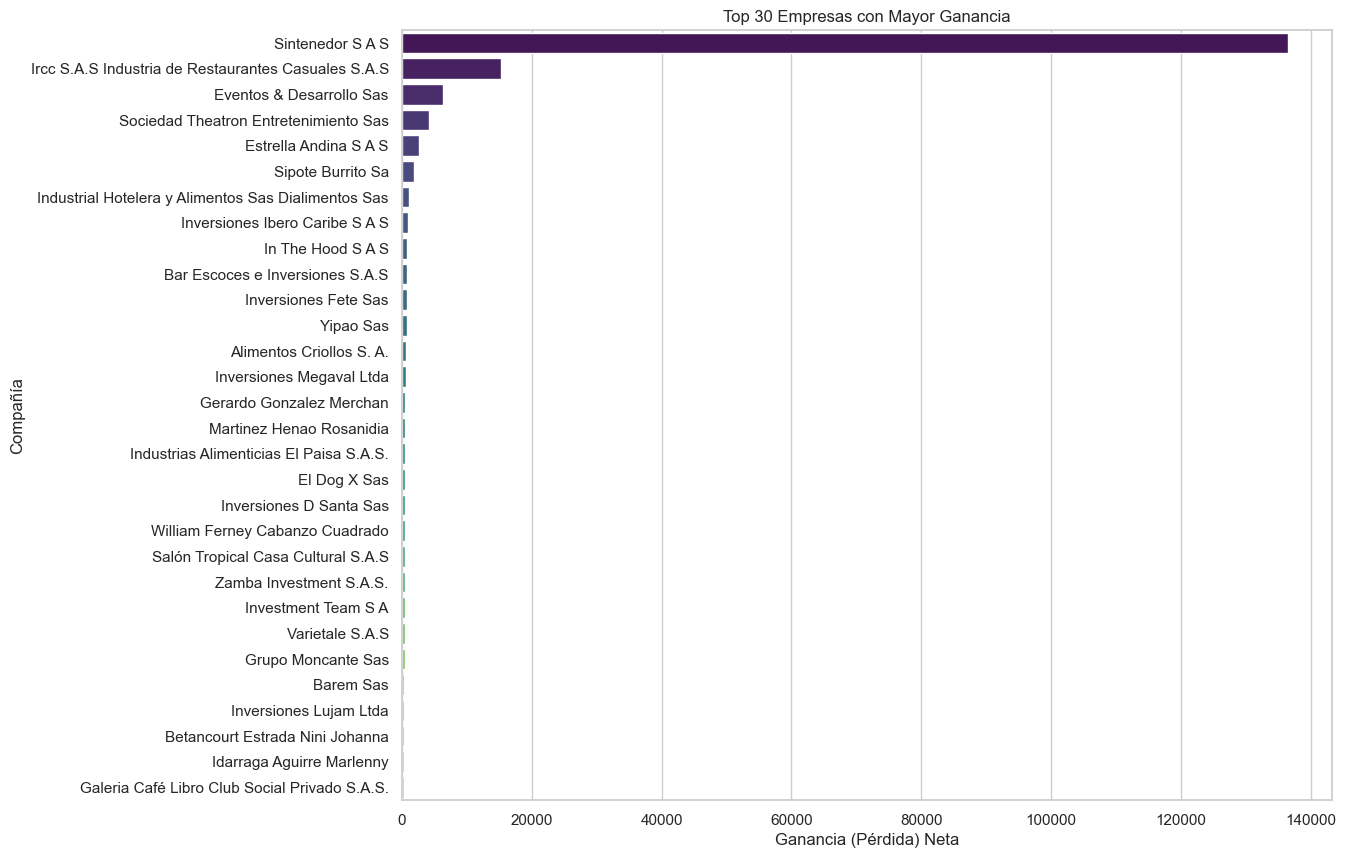

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración para estilo de gráficos
sns.set(style="whitegrid")

# Crear el gráfico de barras
plt.figure(figsize=(12, 10))  # Ajustar el tamaño para acomodar más datos
sns.barplot(x='Ganancia (Pérdida) Neta', y='Compañía', data=top_30_ganancias, palette='viridis')
plt.title('Top 30 Empresas con Mayor Ganancia')
plt.xlabel('Ganancia (Pérdida) Neta')
plt.ylabel('Compañía')
plt.show()


In [13]:
import pandas as pd
import folium
from folium.plugins import MarkerCluster
from geopy.geocoders import Nominatim
import re  # Para limpiar las direcciones
from IPython.display import display

# Cargar el archivo Excel en un DataFrame
df = pd.read_excel('mercado.xlsx')

# Filtrar y ordenar el DataFrame por la ganancia neta
top_ganancias = df.nlargest(30, 'Ganancia (Pérdida) Neta')[['Compañía', 'Ganancia (Pérdida) Neta', 'Dirección']]

# Crear un mapa centrado en un lugar representativo (por ejemplo, Bogotá)
mapa = folium.Map(location=[4.6101, -74.0817], zoom_start=12)

# Crear un clúster de marcadores
marker_cluster = MarkerCluster().add_to(mapa)

# Inicializar el geocodificador
geolocator = Nominatim(user_agent="mi_geocodificador")

# Función para limpiar la dirección
def limpiar_direccion(direccion):
    return re.sub(r',? Piso \d+', '', direccion)  # Elimina "Piso" seguido de un número

# Agregar marcadores al mapa para las empresas con mayores ganancias
for index, row in top_ganancias.iterrows():
    direccion = limpiar_direccion(f"{row['Dirección']}, Bogotá")  # Asegúrate de que las direcciones estén completas

    try:
        # Intentar geocodificar la dirección
        location = geolocator.geocode(direccion, timeout=10)
    except Exception as e:
        print(f"Error al geocodificar '{direccion}': {e}")
        continue

    if location:
        # Crear contenido para el popup
        popup_content = f"<strong>Compañía:</strong> {row['Compañía']}<br><strong>Ganancia Neta:</strong> {row['Ganancia (Pérdida) Neta']}"
        
        folium.Marker(
            location=[location.latitude, location.longitude],
            popup=folium.Popup(popup_content, max_width=300),
            icon=folium.Icon(color='green')  # Cambia el color si deseas
        ).add_to(marker_cluster)
        print(f"Georeferenciado exitoso: {direccion}")
    else:
        print(f"No se pudo geocodificar la dirección: {direccion}")

# Mostrar el mapa en Jupyter Notebook
display(mapa)


Georeferenciado exitoso: Cl 100 # 50 -38 Lc 10, Bogotá
Georeferenciado exitoso: 45 # 232 - 35 Lc 4 - 113, Bogotá
Georeferenciado exitoso: Cra 13 83 - 47, Bogotá
Georeferenciado exitoso: Cl 58 Bis # 10 32, Bogotá
Georeferenciado exitoso: Calle 84 # 11 - 50, Bogotá
No se pudo geocodificar la dirección: Cll 98 A # 60-53, Bogotá
No se pudo geocodificar la dirección: Cl 28 # 32 A 61, Bogotá
Georeferenciado exitoso: Avenida Calle 26 # 113-31, Bogotá
No se pudo geocodificar la dirección: Dg 75 N 2 -63, Bogotá
No se pudo geocodificar la dirección: Cra 99 25 F 33, Bogotá
Georeferenciado exitoso: Cl 83 # 12 A 36, Bogotá
Georeferenciado exitoso: Cl 18 65A 03, Bogotá
Georeferenciado exitoso: Calle 75 A N 27-15, Bogotá
No se pudo geocodificar la dirección: Av Calle 26 N. 62-47 Local 3009 Cc Gran Estacion, Bogotá
Georeferenciado exitoso: Cr 56 # 4 13, Bogotá
Georeferenciado exitoso: Cl 6 6 53, Bogotá
No se pudo geocodificar la dirección: Cra 99 # 25 F-33, Bogotá
Georeferenciado exitoso: Cl 64 # 13 2

In [14]:
import pandas as pd
import folium
from folium.plugins import MarkerCluster
from geopy.geocoders import Nominatim
import time
import re  # Importar el módulo de expresiones regulares
from IPython.display import display  # Importar display para mostrar el mapa

# Cargar el archivo Excel en un DataFrame
df = pd.read_excel('mercado.xlsx')

# Filtrar el DataFrame para incluir solo las filas con dirección no nula
df = df[df['Dirección'].notna()]

# Tomar los primeros 20 registros
df_10 = df.head(20)

# Crear un mapa centrado en Bogotá
mapa = folium.Map(location=[4.6101, -74.0817], zoom_start=12)  # Coordenadas aproximadas de Bogotá

# Crear un clúster de marcadores
marker_cluster = MarkerCluster().add_to(mapa)

# Inicializar el geocodificador
geolocator = Nominatim(user_agent="mi_geocodificador")

# Función para limpiar la dirección
def limpiar_direccion(direccion):
    # Eliminar "Piso" y lo que le sigue
    direccion_limpia = re.sub(r',? Piso \d+', '', direccion)  # Elimina "Piso" seguido de un número
    return direccion_limpia

# Agregar marcadores al mapa para los primeros 20 registros
for index, row in df_10.iterrows():
    # Limpiar la dirección para quitar información de piso
    direccion = limpiar_direccion(f"{row['Dirección']}, Bogotá")
    
    try:
        # Intentar geocodificar la dirección
        location = geolocator.geocode(direccion, timeout=10)  # Timeout de 10 segundos
    except Exception as e:
        print(f"Error al geocodificar '{direccion}': {e}")
        continue  # Continuar con la siguiente dirección

    if location:
        # Crear contenido para el popup con todas las columnas
        popup_content = "<strong>Detalles de la Compañía:</strong><br>"
        for col in df.columns:
            popup_content += f"<strong>{col}:</strong> {row[col]}<br>"
        
        # Determinar el color del icono basado en la ganancia neta
        if row['Ganancia (Pérdida) Neta'] < 0:
            color = 'red'  # Color rojo para pérdidas
        else:
            color = 'green'  # Color verde para ganancias
        
        folium.Marker(
            location=[location.latitude, location.longitude],
            popup=folium.Popup(popup_content, max_width=300),
            icon=folium.Icon(color=color)
        ).add_to(marker_cluster)
        print(f"Georeferenciado exitoso: {direccion}")
    else:
        print(f"No se pudo geocodificar la dirección: {direccion}")

    # Pausa de 1 segundo entre solicitudes para evitar limitaciones
    time.sleep(1)

# Mostrar el mapa en Jupyter Notebook
display(mapa)


Georeferenciado exitoso: Cl 73 # 8 - 13 To A P 3, Bogotá
Georeferenciado exitoso: 45 # 232 - 35 Lc 4 - 113, Bogotá
Georeferenciado exitoso: Cra 53 A No 127 - 35, Bogotá
Georeferenciado exitoso: Calle 84 # 11 - 50, Bogotá
No se pudo geocodificar la dirección: Av Cr 24 # 52 - 18, Bogotá
Georeferenciado exitoso: Cra 13 83 - 47, Bogotá
No se pudo geocodificar la dirección: Cl 28 # 32 A 61, Bogotá
No se pudo geocodificar la dirección: Cr 15 79-83, Bogotá
Georeferenciado exitoso: Cr 25 A 44 69 Sur, Bogotá
No se pudo geocodificar la dirección: Cll 98 A # 60-53, Bogotá
Georeferenciado exitoso: Calle 75 A N 27-15, Bogotá
Georeferenciado exitoso: Cl 58 Bis # 10 32, Bogotá
Georeferenciado exitoso: Cll 94 B N 56 24, Bogotá
No se pudo geocodificar la dirección: Cra 63 No 100 77, Bogotá
No se pudo geocodificar la dirección: Calle 174 A 53 A 22, Bogotá
Georeferenciado exitoso: Calle 116 # 19 -66, Bogotá
No se pudo geocodificar la dirección: Cr 59 D # 131A-25, Bogotá
Georeferenciado exitoso: Carrera 1

In [14]:
import pandas as pd
import folium
from folium.plugins import MarkerCluster
from geopy.geocoders import Nominatim
import time
import re  # Importar el módulo de expresiones regulares
from IPython.display import display  # Importar display para mostrar el mapa

# Cargar el archivo Excel en un DataFrame
df = pd.read_excel('mercado.xlsx')

# Filtrar el DataFrame para incluir solo las filas con dirección no nula y con ganancia neta
df = df[df['Dirección'].notna() & df['Ganancia (Pérdida) Neta'].notna()]

# Tomar los primeros 20 registros
df_10 = df.head(100)

# Crear un mapa centrado en Bogotá
mapa = folium.Map(location=[4.6101, -74.0817], zoom_start=12)  # Coordenadas aproximadas de Bogotá

# Crear un clúster de marcadores
marker_cluster = MarkerCluster().add_to(mapa)

# Inicializar el geocodificador
geolocator = Nominatim(user_agent="mi_geocodificador")

# Función para limpiar la dirección
def limpiar_direccion(direccion):
    # Eliminar "Piso" y lo que le sigue
    direccion_limpia = re.sub(r',? Piso \d+', '', direccion)  # Elimina "Piso" seguido de un número
    return direccion_limpia

# Agregar marcadores al mapa para los primeros 20 registros
for index, row in df_10.iterrows():
    # Limpiar la dirección para quitar información de piso
    direccion = limpiar_direccion(f"{row['Dirección']}, Bogotá")
    
    try:
        # Intentar geocodificar la dirección
        location = geolocator.geocode(direccion, timeout=10)  # Timeout de 10 segundos
    except Exception as e:
        print(f"Error al geocodificar '{direccion}': {e}")
        continue  # Continuar con la siguiente dirección

    if location:
        # Crear contenido para el popup con todas las columnas
        popup_content = "<strong>Detalles de la Compañía:</strong><br>"
        for col in df.columns:
            popup_content += f"<strong>{col}:</strong> {row[col]}<br>"
        
        # Determinar el color del icono según la ganancia neta
        if row['Ganancia (Pérdida) Neta'] < 0:
            color = 'red'  # Rojo para pérdidas
        else:
            color = 'green'  # Verde para ganancias
        
        folium.Marker(
            location=[location.latitude, location.longitude],
            popup=folium.Popup(popup_content, max_width=300),
            icon=folium.Icon(color=color),  # Cambiar color según la ganancia neta
            tooltip=row['Compañía']  # Mostrar el nombre de la empresa como tooltip
        ).add_to(marker_cluster)
        print(f"Georeferenciado exitoso: {direccion}")
    else:
        print(f"No se pudo geocodificar la dirección: {direccion}")

    # Pausa de 1 segundo entre solicitudes para evitar limitaciones
    time.sleep(1)

# Mostrar el mapa en Jupyter Notebook
display(mapa)


Georeferenciado exitoso: Cl 73 # 8 - 13 To A P 3, Bogotá
Georeferenciado exitoso: 45 # 232 - 35 Lc 4 - 113, Bogotá
Georeferenciado exitoso: Cra 53 A No 127 - 35, Bogotá
Georeferenciado exitoso: Calle 84 # 11 - 50, Bogotá
No se pudo geocodificar la dirección: Av Cr 24 # 52 - 18, Bogotá
Georeferenciado exitoso: Cra 13 83 - 47, Bogotá
No se pudo geocodificar la dirección: Cl 28 # 32 A 61, Bogotá
No se pudo geocodificar la dirección: Cr 15 79-83, Bogotá
Georeferenciado exitoso: Cr 25 A 44 69 Sur, Bogotá
No se pudo geocodificar la dirección: Cll 98 A # 60-53, Bogotá
Georeferenciado exitoso: Calle 75 A N 27-15, Bogotá
Georeferenciado exitoso: Cl 58 Bis # 10 32, Bogotá
Georeferenciado exitoso: Cll 94 B N 56 24, Bogotá
No se pudo geocodificar la dirección: Cra 63 No 100 77, Bogotá
No se pudo geocodificar la dirección: Calle 174 A 53 A 22, Bogotá
Georeferenciado exitoso: Calle 116 # 19 -66, Bogotá
No se pudo geocodificar la dirección: Cr 59 D # 131A-25, Bogotá
Georeferenciado exitoso: Carrera 1